In [1]:
import os
import matplotlib.pyplot as plt
import essentia.standard as ess
import numpy as np


In [2]:
main_data_dir = ''

inst_files = [] #list of all files
for file in os.listdir(main_data_dir+'/audios/'):
    if (file.endswith('.aif') or file.endswith('.aiff') or file.endswith('.wav')):
        file_name = os.path.join(main_data_dir,'audios',file)
        inst_files.append(file_name)

#Let's print the list of files
inst_files


['../data/hindustani_tabla/audios/ben_23.wav',
 '../data/hindustani_tabla/audios/dli_6.wav',
 '../data/hindustani_tabla/audios/ajr_10_ajr.wav',
 '../data/hindustani_tabla/audios/ajr_10_dli.wav',
 '../data/hindustani_tabla/audios/ajr_11.wav',
 '../data/hindustani_tabla/audios/ajr_12.wav',
 '../data/hindustani_tabla/audios/ajr_9.wav',
 '../data/hindustani_tabla/audios/ben_19.wav',
 '../data/hindustani_tabla/audios/ben_20.wav',
 '../data/hindustani_tabla/audios/ben_21.wav',
 '../data/hindustani_tabla/audios/ben_22.wav',
 '../data/hindustani_tabla/audios/frk_28.wav',
 '../data/hindustani_tabla/audios/frk_30.wav',
 '../data/hindustani_tabla/audios/frk_31.wav',
 '../data/hindustani_tabla/audios/luc_14.wav',
 '../data/hindustani_tabla/audios/luc_16.wav',
 '../data/hindustani_tabla/audios/luc_17.wav',
 '../data/hindustani_tabla/audios/luc_18.wav',
 '../data/hindustani_tabla/audios/pjb_75.wav',
 '../data/hindustani_tabla/audios/pjb_76.wav',
 '../data/hindustani_tabla/audios/pjb_77.wav',
 '../da

Sample waveform plots


<IPython.core.display.Javascript object>


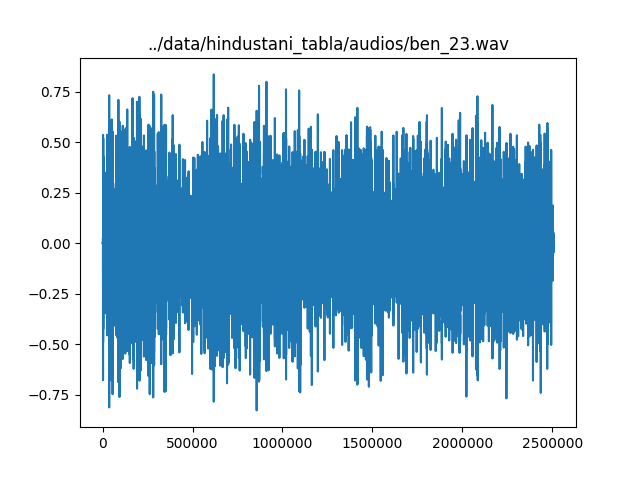

In [3]:
%matplotlib notebook
fs = 44100

print("Sample waveform plots")
sample_file = inst_files[0]
x = ess.MonoLoader(filename = sample_file, sampleRate = fs)()

plt.plot(x)
plt.title(sample_file)
plt.show()


In [4]:
def split_file_from_ann(filename,fs):
    '''Function to define split boundaries from onset annotations
    '''
    x = ess.MonoLoader(filename = filename, sampleRate = fs)()
    filename=filename.replace('audios','onsNoMap')
    filename=filename.replace('wav','csv')
    onsets=np.loadtxt(filename,delimiter=',',usecols=0)
    bols=np.loadtxt(filename,delimiter=',',usecols=1,dtype=str)
    for i in range(len(bols)):
        bols[i]=bols[i].strip()
    start_indexes=np.array(onsets*fs,dtype=int)
    stop_indexes=np.array(onsets[1:]*fs,dtype=int)
    stop_indexes=np.append(stop_indexes,len(x))
    return (start_indexes, stop_indexes, bols)


In [5]:
fs=44100

In [6]:
segments_dir = os.path.join(main_data_dir,'segments')
if not os.path.exists(segments_dir):#creating the directory
    os.mkdir(segments_dir)

segment_files = []
bol_counts={}
for sample_file in inst_files:
    file_count=0
    x = ess.MonoLoader(filename = sample_file, sampleRate = fs)()
    (start_indexes, stop_indexes, bols) = split_file_from_ann(sample_file,fs)
    #Croping segments
    for start, stop in zip(start_indexes, stop_indexes):
        x_seg = x[start: stop]
        #Final check for amplitude (to avoid silent segments selection due to noise in split function)
        if(np.max(np.abs(x_seg)) > 0.05):
            #Amplitude normalisation
            x_seg = x_seg / np.max(np.abs(x_seg))
            
            bol_curr=bols[file_count]
            if not os.path.exists(os.path.join(segments_dir,bol_curr)):#creating the directory
                os.mkdir(os.path.join(segments_dir,bol_curr))
            if bol_curr in bol_counts.keys():
                bol_counts[bol_curr]+=1
            else:
                bol_counts[bol_curr]=0
            
            filename = os.path.join(segments_dir, bol_curr + '_' + str(bol_counts[bol_curr]) + '.wav')
            ess.MonoWriter(filename = filename, format = 'wav', sampleRate = fs)(x_seg)
            file_count +=1
            segment_files.append(filename)

print(len(segment_files),'segment files created')


8226 segment files created
